## <CENTER>TOMATO PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv("Tomato.csv")

In [3]:
data.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


In [5]:
data.describe()

,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


In [6]:
data.shape

(2741, 6)

In [7]:
data.isnull().mean()*100

Date       0.0
Unit       0.0
Minimum    0.0
Maximum    0.0
Average    0.0
Market     0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

## UNIVARIATE ANALYSIS

## HISTOGRAM

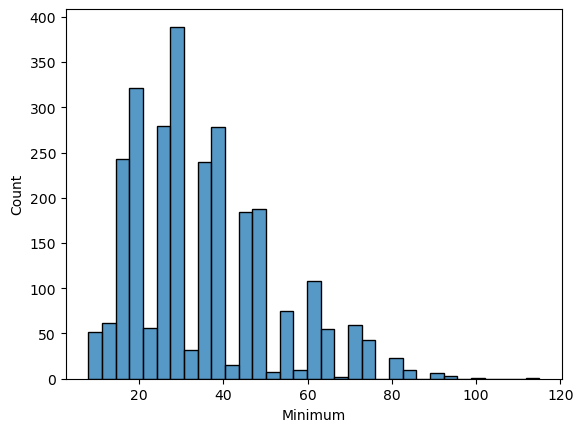

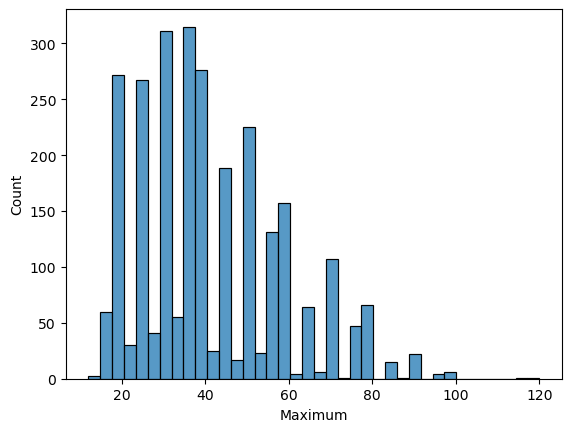

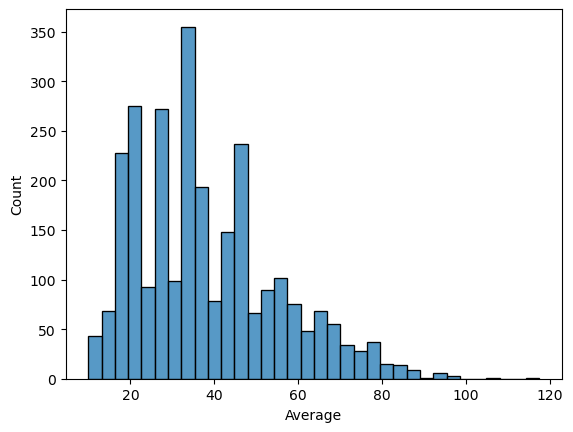

In [9]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x =data[i] )
        plt.show()

## KDE PLOT

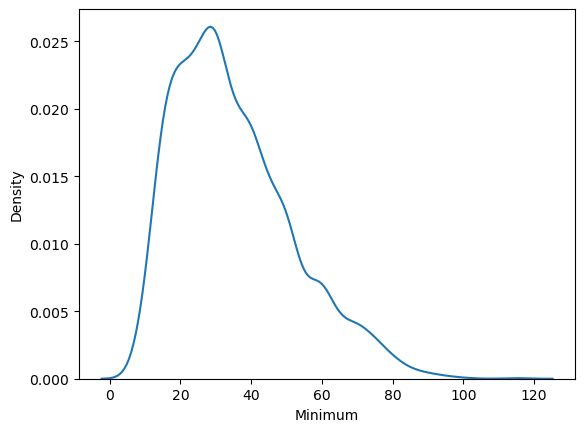

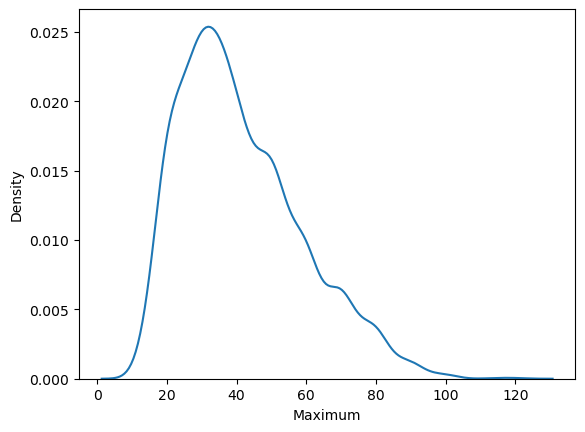

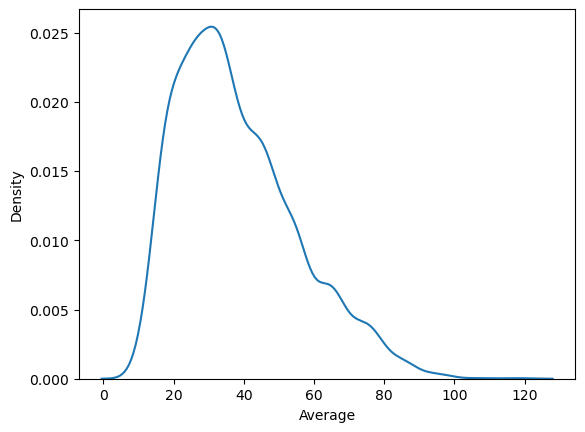

In [10]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i] )
        plt.show()

## BOX PLOT

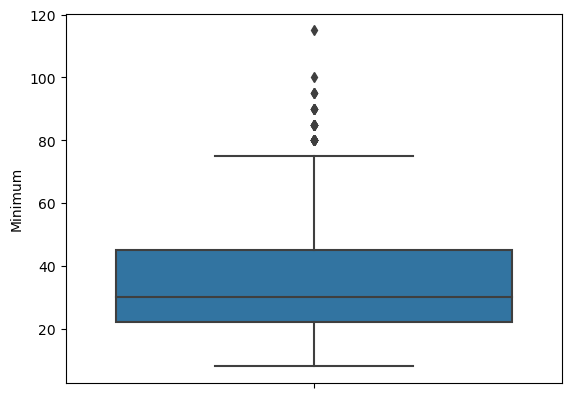

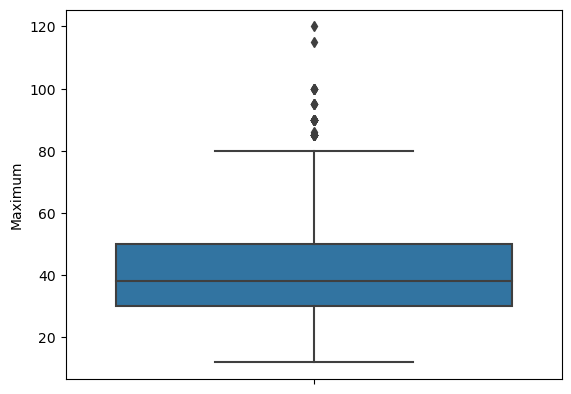

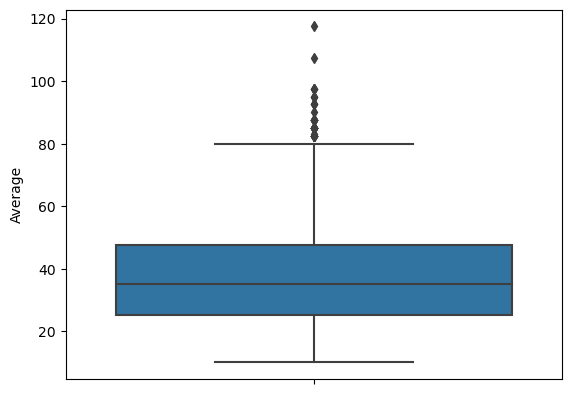

In [11]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y =data[i])
        plt.show();

## SUB PLOT

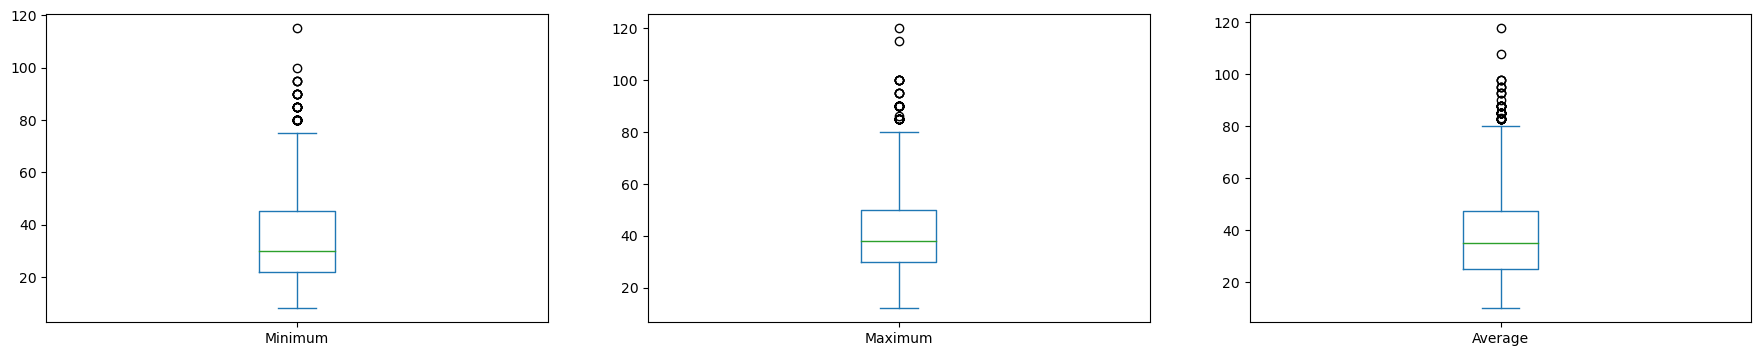

In [12]:
data.plot.box(figsize=(22,4),subplots=True);

## PAIR PLOT

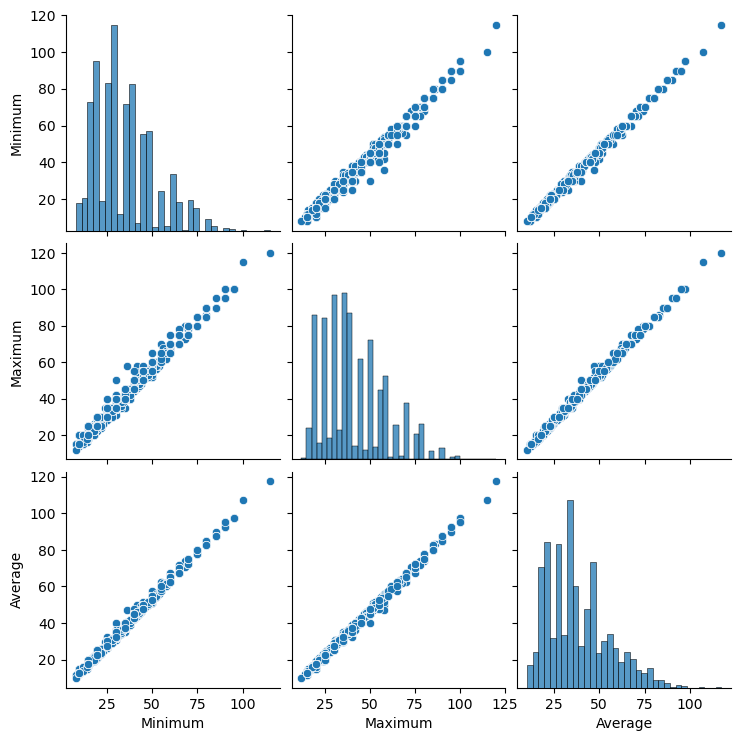

In [13]:
sns.pairplot(data=data)
plt.show()

## MULTI VARIATE ANALYSIS

In [14]:
data.columns

Index(['Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Market'], dtype='object')

## BAR PLOT

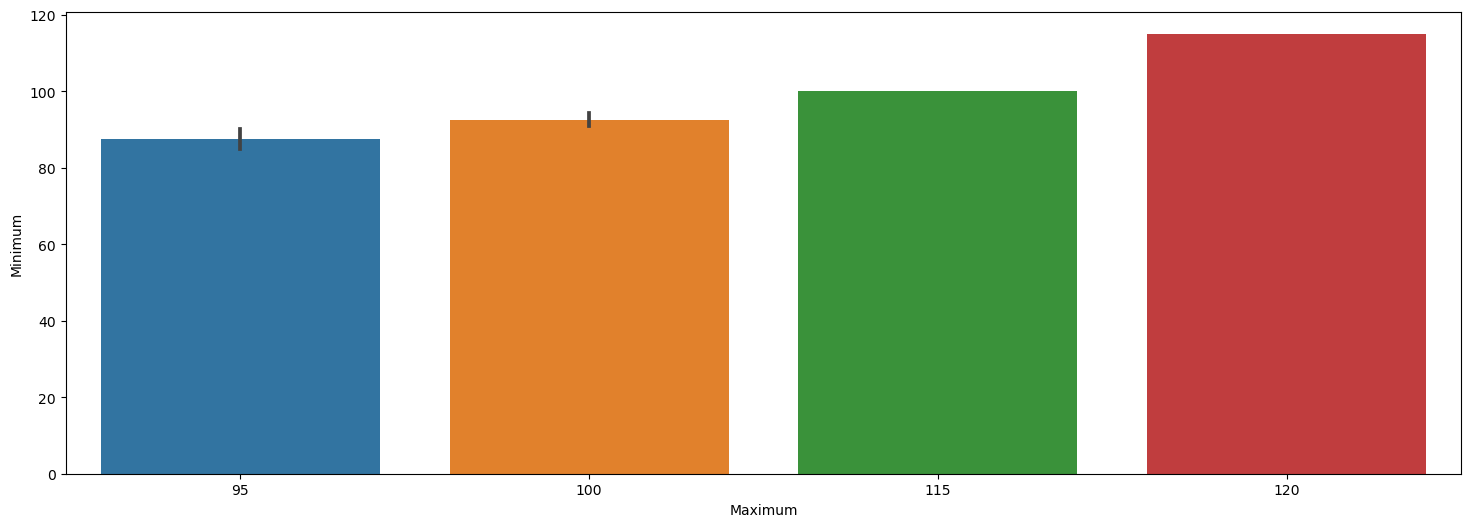

In [15]:
plt.figure(figsize=(18,6))
sns.barplot(x='Maximum', y='Minimum', data=data.sort_values(by='Maximum',ascending=False)[:10]);

## LINE PLOT

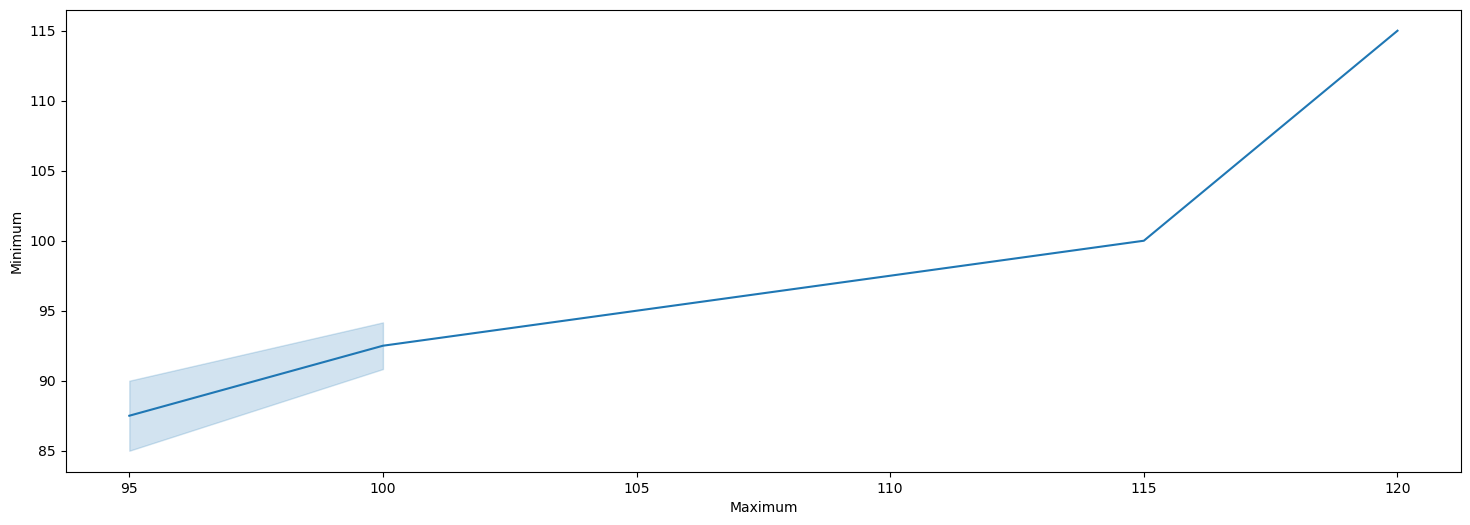

In [16]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Maximum', y='Minimum', data=data.sort_values(by='Maximum',ascending=False)[:10]);

## OUTLIER TREATMENT

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [19]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

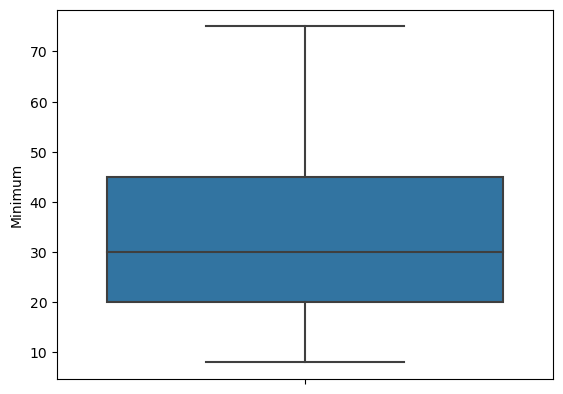

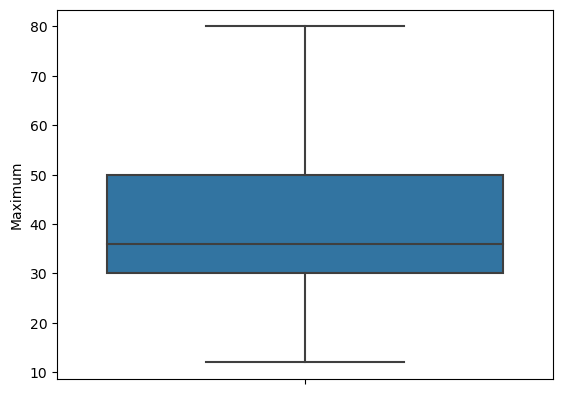

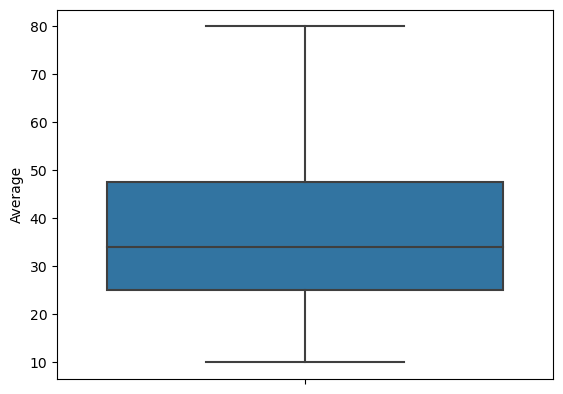

In [20]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show();

In [21]:
data.dropna(inplace=True)

## LABEL ENCODING THE CATEGORICAL COLUMN

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2691 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2691 non-null   object 
 1   Unit     2691 non-null   object 
 2   Minimum  2691 non-null   float64
 3   Maximum  2691 non-null   float64
 4   Average  2691 non-null   float64
 5   Market   2691 non-null   object 
dtypes: float64(3), object(3)
memory usage: 147.2+ KB


In [23]:
cols=["Date","Unit","Market"]
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)

In [24]:
data.columns

Index(['Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Market'], dtype='object')

## CHECKING THE CORRELATION WITH THE TARGET

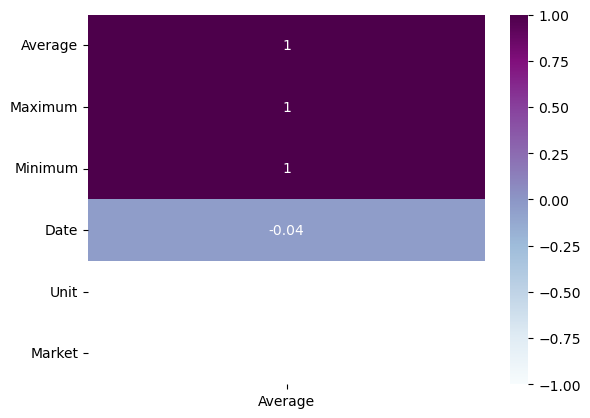

In [26]:
sns.heatmap(data.corr()[['Average']].sort_values(by='Average',ascending=False),vmin=-1,vmax=1,annot=True,cmap="BuPu");

In [27]:
x=data[["Minimum","Maximum"]].values
y=data[["Average"]].values

## FEATURE SCALING

In [28]:
sc = StandardScaler()

In [29]:
x=sc.fit_transform(x)


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## CROSS VALIDATION

In [31]:
models={
       'LinearRegression':LinearRegression(),
       "Ridge":Ridge(),
      "LinearSVR":LinearSVR(),
      "DecisionTreeRegressor":DecisionTreeRegressor(),
      "GradientBoostingRegressor":GradientBoostingRegressor(),
      "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor()
}

In [32]:
for name,model in models.items():
    scores=cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 6.32756847290189e-15
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 0.0034990095943502643
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 2.8885907336539565e-11
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 0.18745838925629513
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 0.13728976878301405
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 0.8868249624378732
*************************************************

## MODEL BUILDING

In [33]:
model=Ridge()

In [34]:
model.fit(x_train,y_train)

Ridge()

In [35]:
y_pred=model.predict(x)

## PREDICTING Y

In [36]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,29.0,29.001800
1,22.5,22.503688
2,24.0,24.003919
3,26.0,26.003505
4,24.0,24.003919


## SCATTER PLOT

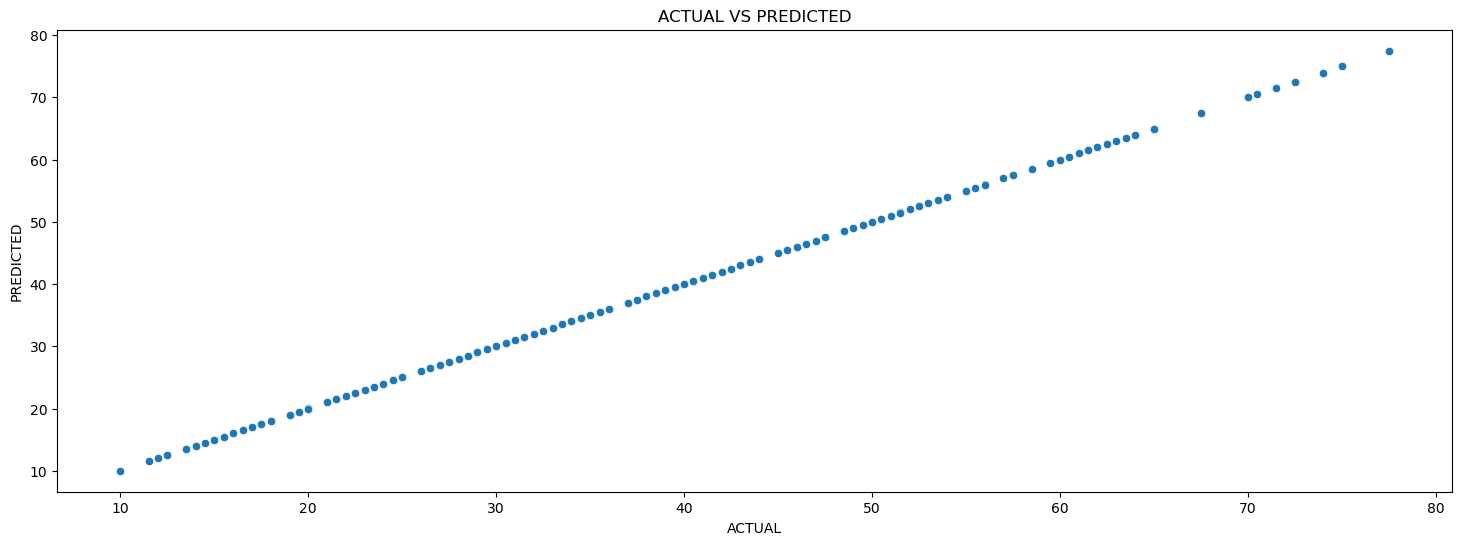

In [37]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

In [38]:
data.shape

(2691, 6)